In [1]:
import pandas as pd
import requests
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

df=pd.read_csv('clean-df.csv')
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
df2=df.copy()

df2

,price,year built,sqft,beds,bathroom,price_sqft,grage,HOA Fees,Address,Time On Web,sqft lot,Condo,Multi-Family,Single Family,Townhome
0,249500,1885.0,1512.0,3.0,2.5,165.0,2,205.000000,"1321 S Christiana Ave, Chicago, IL 60623",1,3125.0,0,0,1,0
1,128250,1942.0,1520.0,4.0,2.0,84.0,1,551.138838,"10119 S Saint Lawrence Ave, Chicago, IL 60628",1,3751.0,0,0,1,0
2,79000,1973.0,575.0,1.0,1.0,137.0,0,316.000000,"3001 S Michigan Ave Unit 1606, Chicago, IL 60616",1,575.0,1,0,0,0
3,325000,1925.0,3125.0,6.0,3.0,104.0,2,175.000000,"5028 W Adams St, Chicago, IL 60644",1,3125.0,0,1,0,0
4,275000,1953.0,1893.0,4.0,2.0,145.0,2,551.138838,"639 E 100th St, Chicago, IL 60628",1,3751.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268,469000,1922.0,1650.0,2.0,2.0,284.0,0,431.000000,"559 W Roscoe St Unit 2W, Chicago, IL 60657",62,1650.0,1,0,0,0
2269,249900,1905.0,1092.0,3.0,1.0,229.0,2,288.000000,"4516 N Central Ave, Chicago, IL 60630",62,4487.0,0,0,1,0
2270,249900,1908.0,1150.0,1.0,1.0,217.0,0,491.000000,"900 S Wabash Ave Apt 704, Chicago, IL 60605",120,1150.0,1,0,0,0
2271,97950,1944.0,1196.0,3.0,1.5,82.0,0,300.000000,"9942 S Luella Ave, Chicago, IL 60617",96,4961.0,0,0,1,0


<AxesSubplot:>

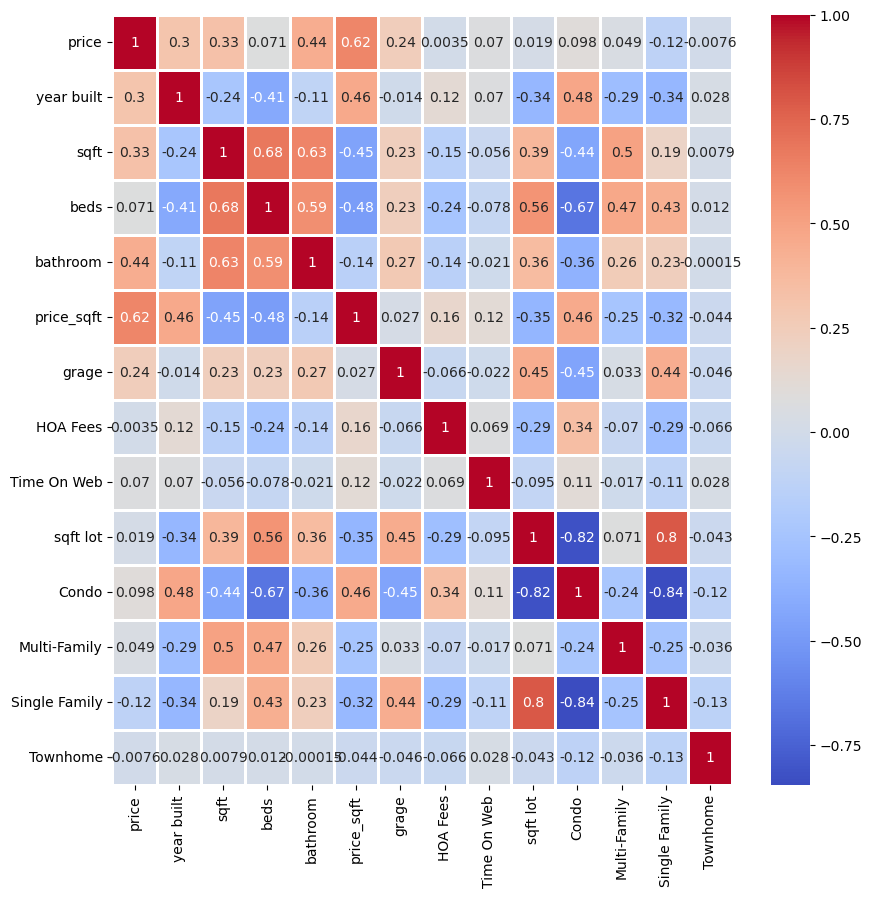

In [2]:
#let's look at the Coorelations
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df2.corr(),cmap='coolwarm', annot=True, linewidth=2, ax=ax)

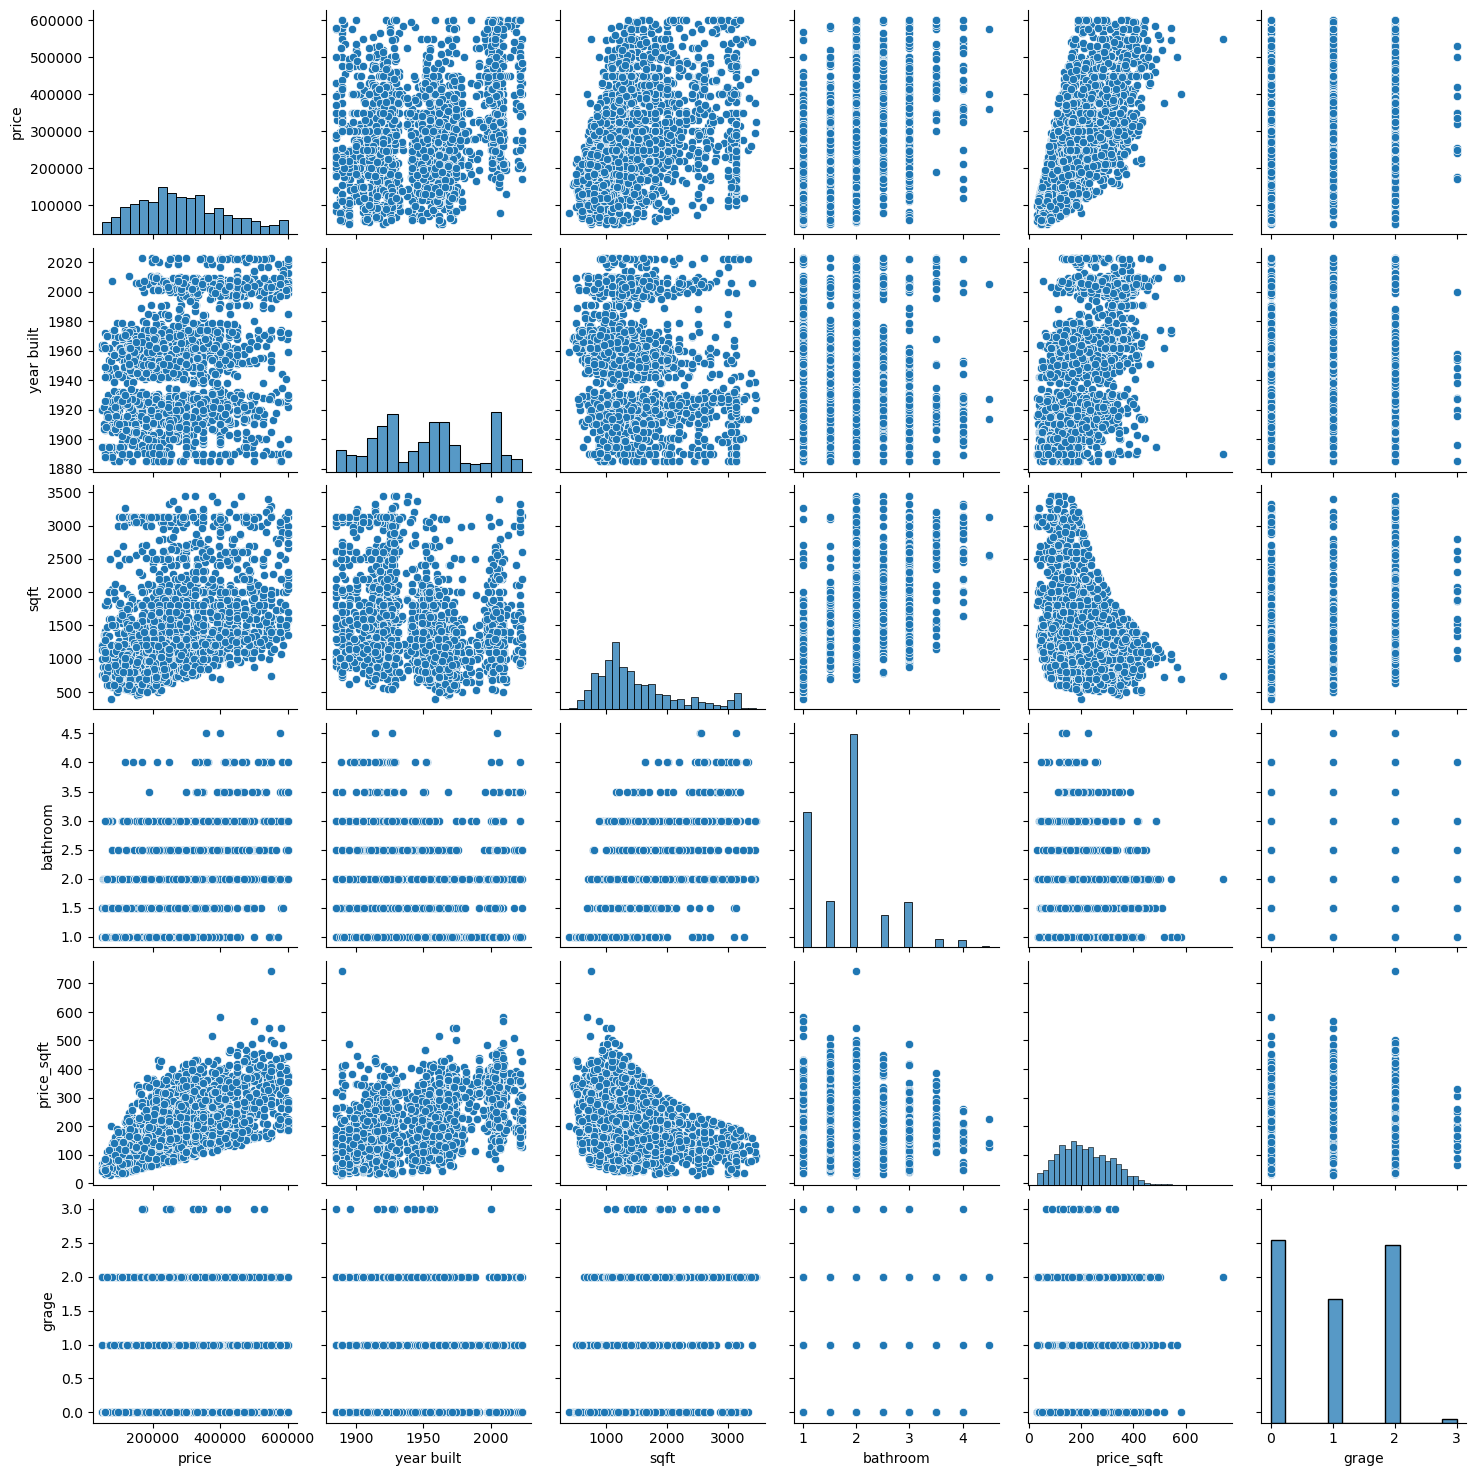

In [3]:
#pairplot with the stats that most effect the value
sns.pairplot(df2[['price','year built' , 'sqft',  'bathroom' ,'price_sqft' ,'grage']])

(array([3.89908460e+07, 4.87158210e+07, 1.10431605e+08, 5.14419310e+07,
        6.16453330e+07, 9.71649340e+07, 6.01635900e+07, 1.66484920e+07,
        1.42546165e+08, 3.09587110e+07]),
 array([1885. , 1898.8, 1912.6, 1926.4, 1940.2, 1954. , 1967.8, 1981.6,
        1995.4, 2009.2, 2023. ]),
 <BarContainer object of 10 artists>)

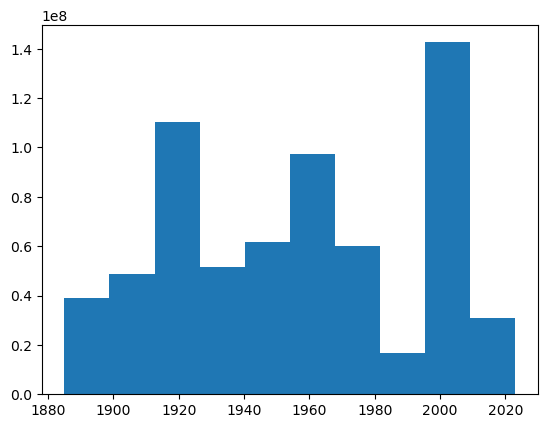

In [4]:
#pairplot with the stats that most effect the value
hist(df2['year built'], weights = df2['price'])
# plt.hists(df2['year built'],df2['price'])
# plt.xlabel("Year Built")
# plt.ylabel("Price")
# plt.title("Price vs Year Built")


# plt.show()

In [5]:
df2['year built'].unique()

array([1885., 1942., 1973., 1925., 1953., 1954., 1914., 1932., 1918.,
       1968., 2009., 2010., 1926., 2022., 1965., 1974., 1971., 1962.,
       1949., 1969., 1890., 1906., 2003., 1887., 1927., 1913., 1944.,
       1923., 1947., 1915., 1920., 1930., 1961., 1888., 2023., 1951.,
       1911., 1999., 2007., 1905., 1929., 1910., 1997., 1970., 1922.,
       1991., 1955., 1941., 1924., 1985., 1928., 1957., 1978., 2004.,
       1938., 1958., 1964., 1979., 1963., 1943., 1945., 1959., 1912.,
       1948., 1908., 1896., 2000., 1921., 2008., 1903., 1931., 1895.,
       2005., 2017., 2002., 1975., 1956., 1891., 1996., 1900., 1899.,
       1989., 2001., 1998., 1916., 1889., 1966., 1886., 1917., 1967.,
       1972., 1946., 1909., 1933., 1893., 1960., 2006., 1935., 1987.,
       1901., 1980., 1919., 1937., 1952., 1907., 2013., 1898., 2019.,
       1977., 1897., 1995., 1939., 1984., 1983., 2014., 2011., 1940.,
       1976., 1904., 1988., 1981., 1992., 1950., 1892., 1902., 1894.,
       2018., 2015.,

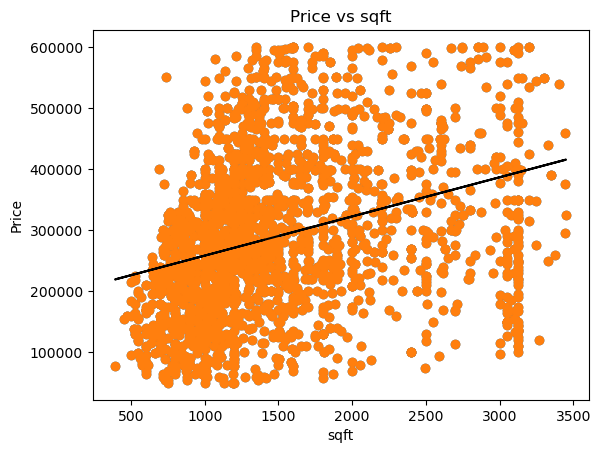

In [6]:
plt.scatter(df2['sqft'],df2['price'])
plt.xlabel("sqft")
plt.ylabel("Price")
plt.title("Price vs sqft")

plt.scatter(df2['sqft'],df2['price']) 

# fitting the mean square line
m,b = np.polyfit(df2['sqft'], df2['price'], 1) 

# plotting the mean square line
plt.plot(df2['sqft'], m*df2['sqft'] + b, color='black') 

plt.show()

<AxesSubplot:ylabel='price'>

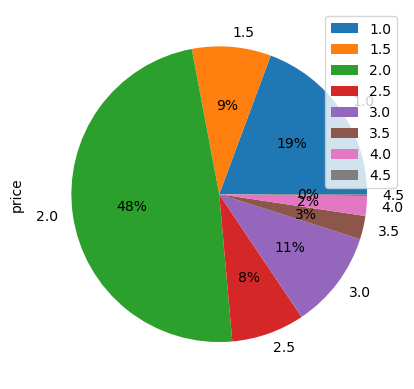

In [7]:
df2.groupby(['bathroom']).sum().plot(
    kind='pie', y='price', autopct='%1.0f%%')

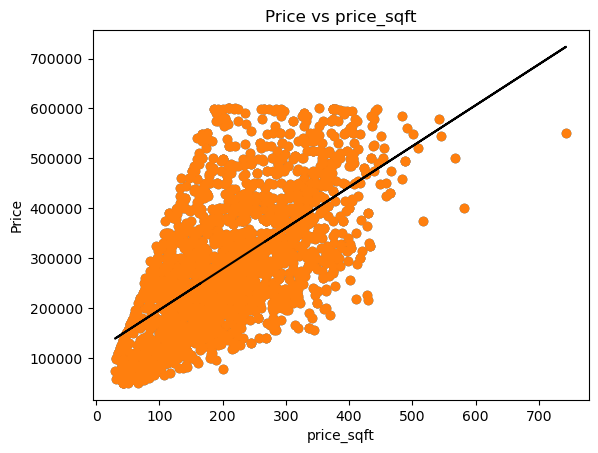

In [8]:
plt.scatter(df2['price_sqft'],df2['price'])
plt.xlabel("price_sqft")
plt.ylabel("Price")
plt.title("Price vs price_sqft")

plt.scatter(df2['price_sqft'],df2['price']) 

# fitting the mean square line
m,b = np.polyfit(df2['price_sqft'], df2['price'], 1) 

# plotting the mean square line
plt.plot(df2['price_sqft'], m*df2['price_sqft'] + b, color='black') 

plt.show()

<AxesSubplot:ylabel='price'>

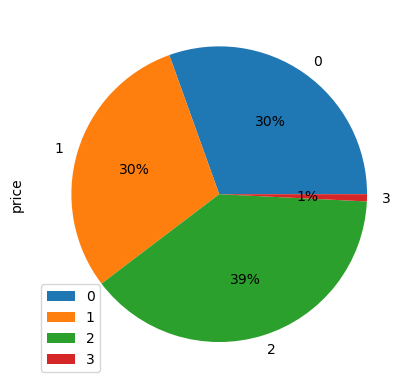

In [9]:
df2.groupby(['grage']).sum().plot(
    kind='pie', y='price', autopct='%1.0f%%')